In [1]:
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from ydata_profiling import ProfileReport




In [2]:
df = pd.read_csv('modu-ds-5-house-prices-prediction/train.csv')

In [3]:
pd.set_option('display.max_columns', None) #열 보여주는 개수 제한 해제
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,151.0,TA,TA,CBlock,TA,TA,No,ALQ,902,Unf,0,196,1098,GasA,TA,Y,SBrkr,1098,0,0,1098,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1955.0,Unf,1,260,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200,Unf,0,0,1200,GasA,TA,Y,SBrkr,1200,0,0,1200,3,0,3,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,6,1987,1987,Gable,CompShg,HdBoard,HdBoard,BrkFace,72.0,TA,TA,CBlock,Gd,Gd,No,GLQ,980,LwQ,40,92,1112,GasA,Gd,Y,SBrkr,1137,0,0,1137,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1987.0,Unf,2,551,TA,TA,Y,125,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000
3,239,20,RL,93.0,12030,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,254.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1694,1694,GasA,Ex,Y,SBrkr,1694,0,0,1694,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,818,TA,TA,Y,168,228,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,Partial,318000
4,891,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,7,1949,2006,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,Mn,Unf,0,Unf,0,672,672,GasA,Ex,Y,SBrkr,672,252,0,924,0,0,1,0,3,1,TA,6,Typ,1,Po,Detchd,2003.0,Unf,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,122900


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.00000,950.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1099.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,728.528253,56.97774,70.058947,10336.357877,6.105308,5.595890,1971.201199,1985.021404,102.938793,442.928938,42.537671,574.708904,1060.175514,1161.748288,344.853596,5.094178,1511.696062,0.425514,0.058219,1.562500,0.388699,2.865582,1.047089,6.511130,0.625856,1978.404914,1.761130,469.888699,90.971747,47.554795,22.715753,3.219178,16.332192,2.955479,51.279110,6.306507,2007.830479,180194.401541
std,415.393477,42.29068,24.762405,8784.854640,1.373032,1.127388,30.362445,20.693264,176.142597,462.364719,151.670697,440.959454,439.223929,392.662227,438.502580,44.876004,535.707765,0.518319,0.241463,0.551882,0.506624,0.824796,0.223722,1.639763,0.654232,24.988391,0.746517,213.604836,123.811685,68.250085,63.042971,29.241246,58.828037,41.648504,552.357575,2.715955,1.323583,78869.201529
min,1.000000,20.00000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,373.750000,20.00000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,0.000000,233.000000,793.000000,880.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,720.500000,50.00000,69.000000,9446.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,374.500000,0.000000,485.500000,990.000000,1077.500000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,477.500000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1086.250000,70.00000,80.000000,11601.500000,7.000000,6.000000,2001.000000,2004.000000,168.000000,714.500000,0.000000,813.250000,1306.000000,1392.500000,728.000000,0.000000,1774.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,165.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213062.500000
max,1460.000000,190.00000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1170.000000,5644.000000,1474.000000,2153.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
pd.set_option('display.max_columns',20 ) #열 보여주는 개수 20 개 제한 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
pd.set_option('display.max_rows', None) #행 보여주는 개수 제한 해제
print(df.isnull().sum()/len(df)) #결측치 확인
pd.set_option('display.max_rows', 60) #행 보여주는 개수 60 개 제한 

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.186644
LotArea          0.000000
Street           0.000000
Alley            0.940068
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.594178
MasVnrArea       0.006849
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.019692
BsmtCond         0.019692
BsmtExposure     0.020548
BsmtFinType1     0.019692
BsmtFinSF1       0.000000
BsmtFinType2     0.020548
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

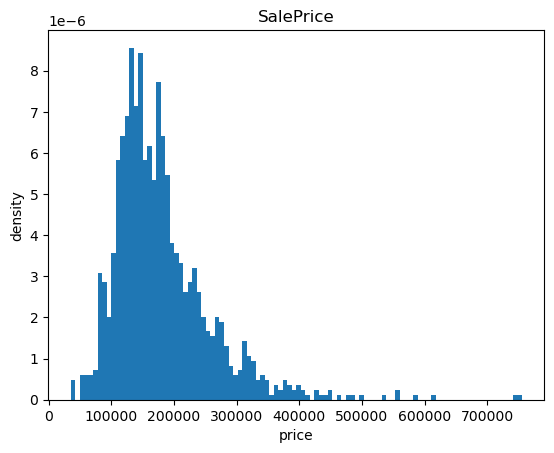

count      1168.000000
mean     180194.401541
std       78869.201529
min       34900.000000
25%      129500.000000
50%      163995.000000
75%      213062.500000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
plt.hist(df['SalePrice'], bins=100, density=True)
plt.title('SalePrice')
plt.xlabel('price')
plt.ylabel('density')
plt.show()

df['SalePrice'].describe()

In [9]:
df = df.drop('Id', axis=1) #ID는 필요없는 데이터

In [10]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_notebook_iframe()

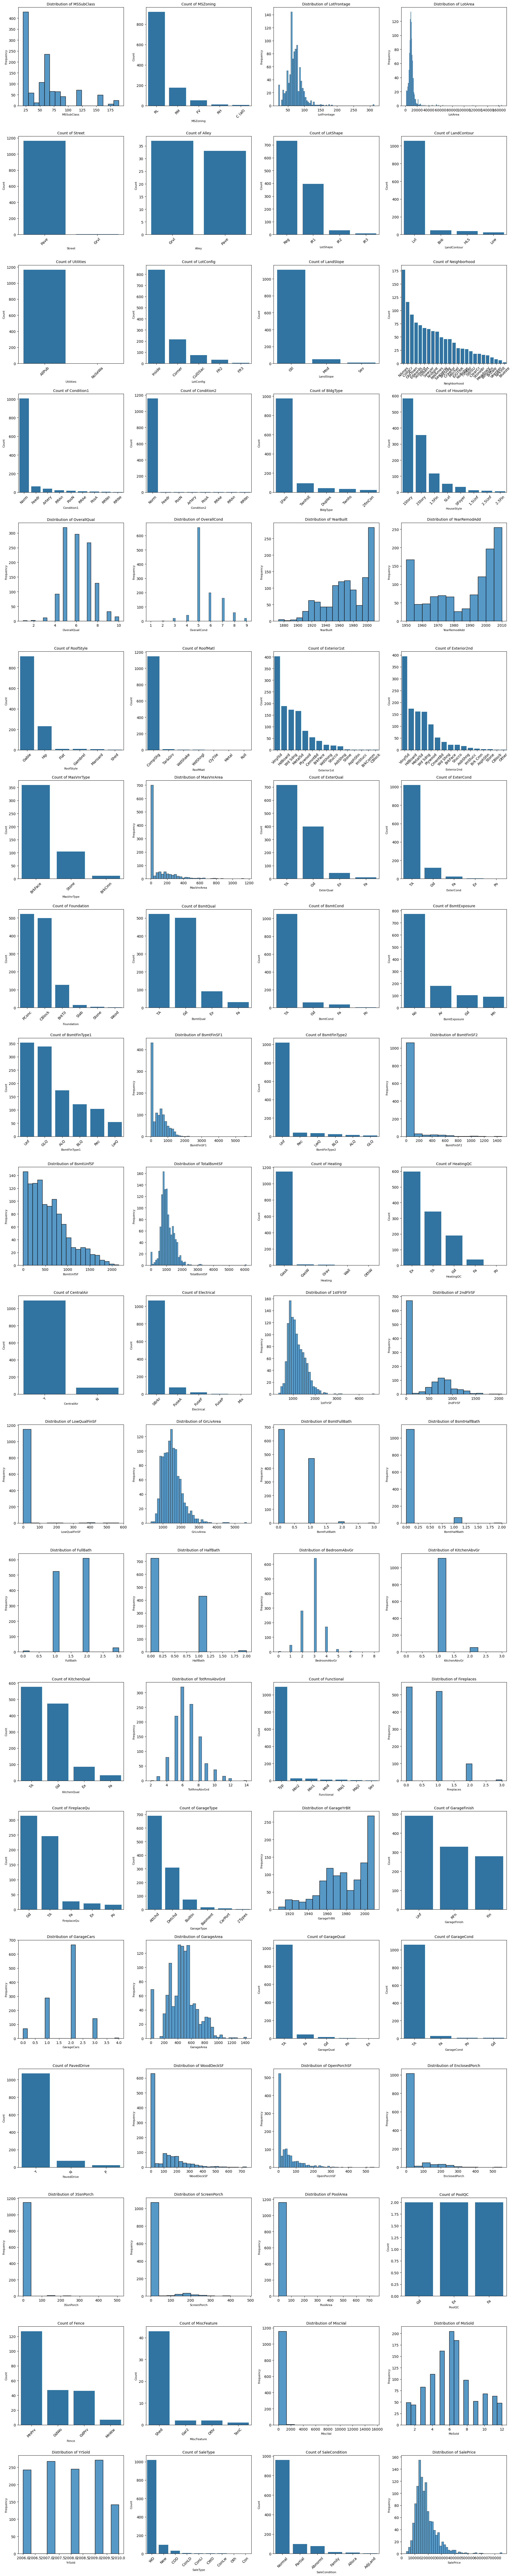

In [11]:
#모든 feature 그리기
import math

num_plots = len(df.columns)
ncols = 4  
nrows = math.ceil(num_plots / ncols) 

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows)) 
axes = axes.flatten()


for idx, column in enumerate(df.columns):
    ax = axes[idx]
    
    if df[column].dtype in [np.int64, np.float64]:
        sns.histplot(df[column], ax=ax)
        ax.set_title(f'Distribution of {column}', fontsize=10)
        ax.set_xlabel(column, fontsize=8)
        ax.set_ylabel('Frequency', fontsize=8)
    else:
        sns.countplot(x=df[column], order=df[column].value_counts().index, ax=ax)
        ax.set_title(f'Count of {column}', fontsize=10)
        ax.set_xlabel(column, fontsize=8)
        ax.set_ylabel('Count', fontsize=8)
        ax.tick_params(axis='x', rotation=45)

for idx in range(num_plots, nrows * ncols):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


In [12]:
#각 데이터의 고유값 확인하기
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    
    unique_values = df[col].unique()
    print(f" {col}: {unique_values}")

    print("\n")


 MSZoning: ['RL' 'RM' 'FV' 'RH' 'C (all)']


 Street: ['Pave' 'Grvl']


 Alley: [nan 'Pave' 'Grvl']


 LotShape: ['IR1' 'Reg' 'IR2' 'IR3']


 LandContour: ['Lvl' 'Bnk' 'HLS' 'Low']


 Utilities: ['AllPub' 'NoSeWa']


 LotConfig: ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']


 LandSlope: ['Gtl' 'Mod' 'Sev']


 Neighborhood: ['NAmes' 'Edwards' 'Timber' 'NridgHt' 'MeadowV' 'BrkSide' 'Somerst'
 'Gilbert' 'CollgCr' 'SWISU' 'OldTown' 'NPkVill' 'NWAmes' 'BrDale'
 'Sawyer' 'SawyerW' 'Crawfor' 'Mitchel' 'NoRidge' 'ClearCr' 'Blmngtn'
 'IDOTRR' 'Blueste' 'StoneBr' 'Veenker']


 Condition1: ['Norm' 'Artery' 'Feedr' 'PosN' 'RRAn' 'PosA' 'RRNn' 'RRAe' 'RRNe']


 Condition2: ['Norm' 'PosA' 'PosN' 'Feedr' 'RRAe' 'Artery' 'RRAn' 'RRNn']


 BldgType: ['1Fam' 'Duplex' 'TwnhsE' 'Twnhs' '2fmCon']


 HouseStyle: ['1Story' '1.5Fin' '2Story' 'SLvl' '2.5Unf' 'SFoyer' '2.5Fin' '1.5Unf']


 RoofStyle: ['Hip' 'Gable' 'Flat' 'Mansard' 'Gambrel' 'Shed']


 RoofMatl: ['CompShg' 'ClyTile' 'Tar&Grv' 'Metal' 'Roll' 'WdSha

일부 범주형 데이터에서 항목에 없는 값들이 포함되어 있음 ex) C (all)

In [13]:
#잘못된 범주형 데이터 값 변환하는 함수
def wrong_data_collect(X):
    X['MSZoning'] = X['MSZoning'].replace('C (all)', 'C')
    X['Neighborhood'] = X['Neighborhood'].replace('NAmes', 'Names')
    X['BldgType'] = X['BldgType'].replace({'Duplex': 'Duplx', '2fmCon': '2FmCon', 'Twnhs': 'TwnhsE'})
    X['Exterior2nd'] = X['Exterior2nd'].replace({'Wd Shng': 'WdShing', 'Brk Cmn': 'BrkComm', 'CmentBd': 'CemntBd'})

    return X

df = wrong_data_collect(df)

In [14]:
#범주형 데이터를 이산형 데이터로 변환

#품질 변환하기
QualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
QualDict2 = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0}
Rating ={'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0.5,'NA':0}
Expo = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
GFin = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
FcQ = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0}

#변환할 열 
Qualcols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
Qualcols2 = ['BsmtFinType1','BsmtFinType2']

#범주형 데이터를 이산형 데이터로 변환하는 함수
def C_to_N(X):
    
    for col in Qualcols:
        X[col] = X[col].map(QualDict)

    for col in Qualcols2:
        X[col] = X[col].map(Rating)

    X['PoolQC'] = X['PoolQC'].map(QualDict2)
    X['BsmtExposure'] = X['BsmtExposure'].map(Expo)
    X['GarageFinish'] = X['GarageFinish'].map(GFin)
    X['Fence'] = X['Fence'].map(FcQ)

    return X

df = C_to_N(df)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(exclude=['int64', 'float64']).columns

#로버스트 스케일링을 적용하고, KNN을 적용해 결측치를 채움
imputation_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('imputer', KNNImputer(n_neighbors=5))
])

#범주형 데이터는 전처리하지 않음
imputer_preprocessor = ColumnTransformer(
    transformers=[
        ('num_impute', imputation_pipeline, numerical_features)
    ],
    remainder='passthrough' 
)

imputer_preprocessor.fit(X_train)
X_train_imputed_scaled_array = imputer_preprocessor.transform(X_train)
X_test_imputed_scaled_array = imputer_preprocessor.transform(X_test)

# --- 스케일링 원복 ---
fitted_scaler = imputer_preprocessor.named_transformers_['num_impute'].named_steps['scaler']
num_feature_count = len(numerical_features)
X_train_numerical_part = X_train_imputed_scaled_array[:, :num_feature_count]
X_test_numerical_part = X_test_imputed_scaled_array[:, :num_feature_count]

X_train_numerical_origin = fitted_scaler.inverse_transform(X_train_numerical_part)
X_test_numerical_origin = fitted_scaler.inverse_transform(X_test_numerical_part)



#원복된 수치형 데이터를 DataFrame으로 만듬
X_train_numerical_df = pd.DataFrame(X_train_numerical_origin, columns=numerical_features, index=X_train.index)
X_test_numerical_df = pd.DataFrame(X_test_numerical_origin, columns=numerical_features, index=X_test.index)

#원본에서 범주형 데이터를 불러오기
X_train_categorical_df = X_train[categorical_features]
X_test_categorical_df = X_test[categorical_features]

X_train_imputed_origin = pd.concat([X_train_numerical_df, X_train_categorical_df], axis=1)
X_test_imputed_origin = pd.concat([X_test_numerical_df, X_test_categorical_df], axis=1)

for col in numerical_features:
    X_train_imputed_origin[col] = pd.to_numeric(X_train_imputed_origin[col])
    X_test_imputed_origin[col] = pd.to_numeric(X_test_imputed_origin[col])

X_train_imputed_origin = pd.concat([X_train_imputed_origin,y_train], axis=1)
X_test_imputed_origin = pd.concat([X_test_imputed_origin,y_test], axis=1)

In [16]:
#feature 연산 함수
def feature_engineering(X):
    
#연식, 리모델링 연식, 정원 연식 특성 추가
    X['BuiltAge'] = X['YrSold'] - X['YearBuilt']
    X['RemodAge'] = X['YrSold'] - X['YearRemodAdd']
    X['GarageAge'] = X['YrSold'] - X['GarageYrBlt']
                     
    X = X.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageArea', 'TotRmsAbvGrd','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF'])

#총 화장실 개수, 난로 개수 추가
    X['TotalBath'] = (X['FullBath'] + X['BsmtFullBath'] +X['HalfBath'] + X['BsmtHalfBath'])
    X['TotalPorchSF'] = (X['OpenPorchSF'] + X['EnclosedPorch'] +X['3SsnPorch'] + X['ScreenPorch'])

    X = X.drop(columns = ['FullBath','BsmtFullBath','HalfBath','BsmtHalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])

#Quality와 Condition을 곱한 새로운 피쳐 생성

    X['PoolQA'] = X['PoolQC']* X['PoolArea']
    X['OverallQC'] = X['OverallQual'] * X['OverallCond']
    X['BsmtQC'] = X['BsmtQual'] * X['BsmtCond']
    X['GarageQC'] = X['GarageQual'] * X['GarageCond']
    X['ExterQC'] = X['ExterQual'] * X['ExterCond']
    X = X.drop(columns=['PoolQC','PoolArea','OverallQual','OverallCond','BsmtQual','BsmtCond','GarageQual','GarageCond','ExterQual','ExterCond'])

    return X
    
X_origin = pd.concat([X_train_imputed_origin,X_test_imputed_origin],ignore_index=True,axis=0)
X_origin = feature_engineering(X_origin)
X_train_imputed_origin = feature_engineering(X_train_imputed_origin)
X_test_imputed_origin = feature_engineering(X_test_imputed_origin)

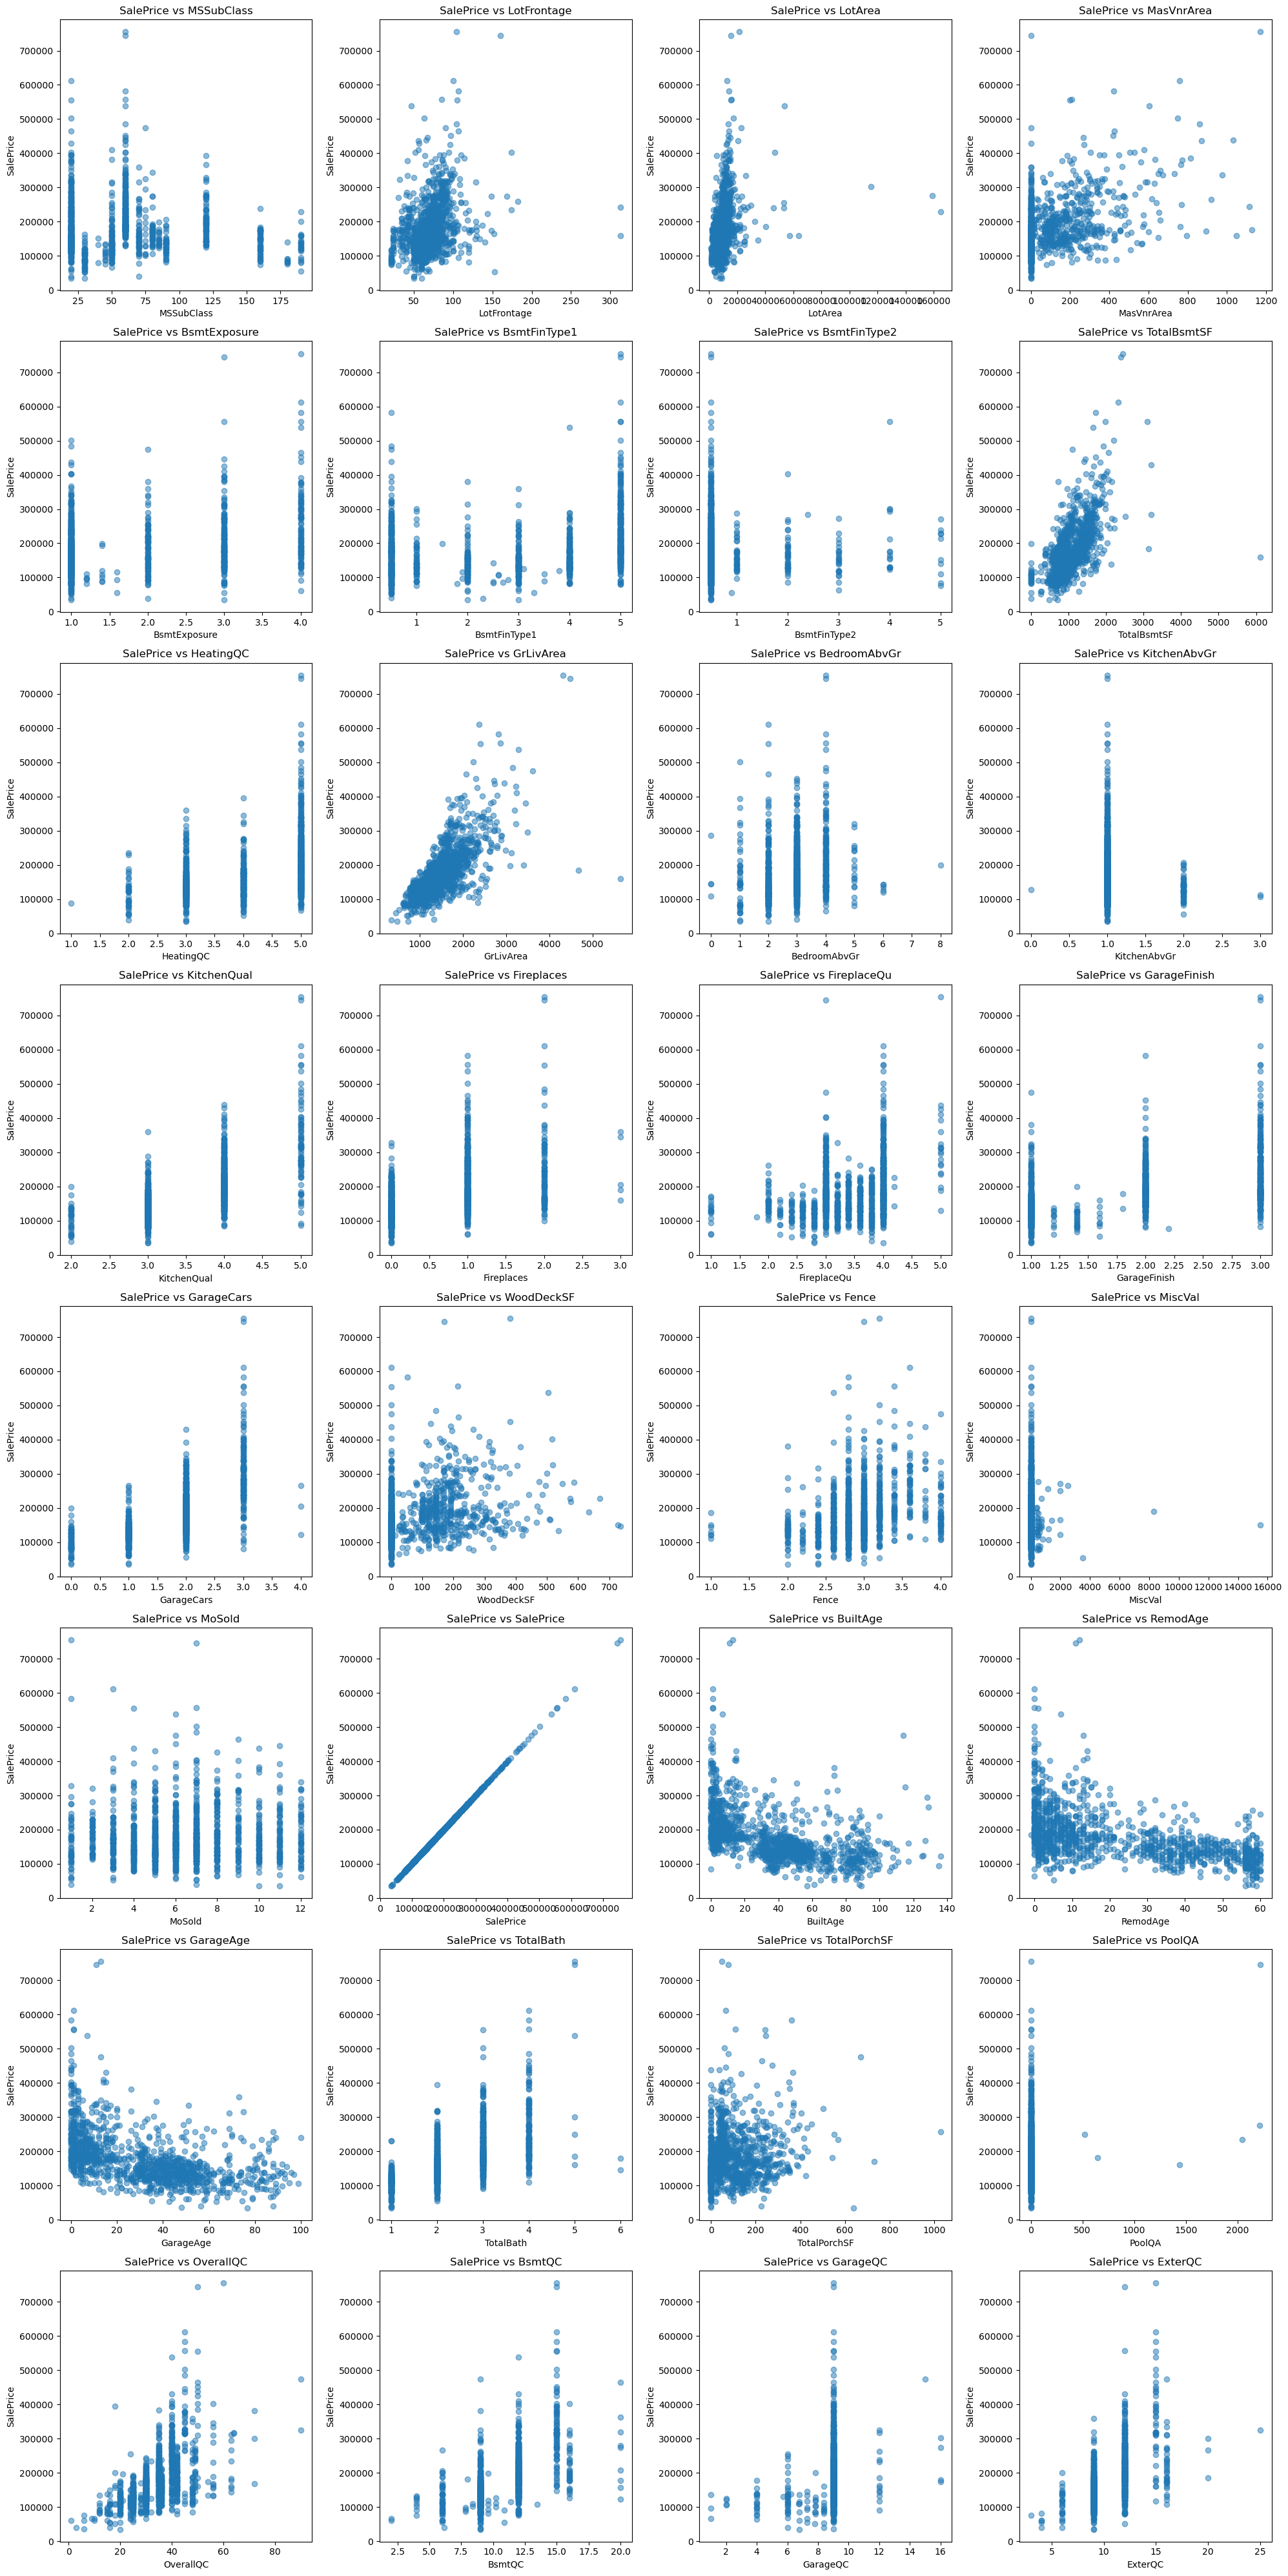

In [17]:
def plot_scatter(X):

    numerical_cols = X.select_dtypes(include=[np.int64, np.float64])
    num_plots = len(numerical_cols.columns)
    ncols = 4  
    nrows = math.ceil(num_plots / ncols) 

    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows)) 
    axes = axes.flatten()

    for idx, column in enumerate(numerical_cols.columns):
        ax = axes[idx]       
        ax.scatter(X[column], X['SalePrice'], alpha=0.5)
        ax.set_title(f'SalePrice vs {column}', fontsize=12)
        ax.set_xlabel(f'{column}', fontsize=10)
        ax.set_ylabel('SalePrice', fontsize=10)

    # 남는 빈 subplot들을 보이지 않게 처리
    for i in range(num_plots, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_scatter(X_origin)

In [18]:
#이상치 제거
def delete_outlier(X):
    X = X[X['SalePrice'] < 700000]
    X = X[X['LotArea'] < 60000]
    X = X[X['LotFrontage'] < 300]
    X = X[X['GrLivArea'] < 4000]
    X = X[X['TotalBsmtSF'] < 6000]
    X = X[X['SalePrice'] < 700000]
    X = X[X['MiscVal'] < 3000]
    X = X[X['TotalPorchSF'] < 1000]
    X = X[X['OverallQC'] < 80]
    X = X[X['ExterQC'] < 25]

    return X
    
X_origin = delete_outlier(X_origin)
X_train_imputed_origin = delete_outlier(X_train_imputed_origin)
X_test_imputed_origin = delete_outlier(X_test_imputed_origin)

In [19]:
#다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(X):
    
    n_df = X.select_dtypes(exclude=['object'])
    vif_check = n_df.drop('SalePrice', axis=1)
    vif = pd.DataFrame()
    vif["feature"] = vif_check.columns
    vif["VIF"] = [variance_inflation_factor(vif_check.values, i) for i in range(len(vif_check.columns))]
    print(vif.sort_values(by='VIF', ascending=False))

check_vif(X_origin)

         feature        VIF
12   KitchenQual  67.890552
29      GarageQC  56.977211
18         Fence  52.948400
30       ExterQC  52.222051
28        BsmtQC  43.942719
9      GrLivArea  39.838743
14   FireplaceQu  36.939706
8      HeatingQC  30.918488
27     OverallQC  29.628641
11  KitchenAbvGr  29.434818
10  BedroomAbvGr  23.779289
1    LotFrontage  21.738582
24     TotalBath  21.628950
7    TotalBsmtSF  14.916497
16    GarageCars  13.983961
21      BuiltAge  11.827840
15  GarageFinish  10.822363
23     GarageAge  10.484297
2        LotArea   7.711085
20        MoSold   6.478137
22      RemodAge   5.500679
0     MSSubClass   5.164627
5   BsmtFinType1   4.818352
4   BsmtExposure   4.758890
13    Fireplaces   2.941323
25  TotalPorchSF   2.174089
6   BsmtFinType2   2.110902
17    WoodDeckSF   1.899808
3     MasVnrArea   1.804019
26        PoolQA   1.139235
19       MiscVal   1.067234


In [20]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [21]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


y_train = np.log1p(X_train_imputed_origin['SalePrice']) #target 분리
y_test = np.log1p(X_test_imputed_origin['SalePrice']) #target 분리

X_train_imputed_origin = X_train_imputed_origin.drop('SalePrice', axis=1) #target 제거 
X_test_imputed_origin = X_test_imputed_origin.drop('SalePrice', axis=1) #target 제거 

numerical_features2 = X_train_imputed_origin.select_dtypes(include=np.number).columns


# 이산형 데이터 로버스트 스케일링함
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# 범주형 데이터 원-핫 인코딩 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 두 파이프라인을 통합
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features2),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train_imputed_origin)
X_test = preprocessor.transform(X_test_imputed_origin)


In [22]:
# LinearRegression, Ridge, Lasso 학습, 예측, 평가
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error


ridge_reg = Ridge(alpha=0.6,max_iter=10000, random_state=42)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.0002,max_iter=10000, random_state=42)
lasso_reg.fit(X_train, y_train)

elastic_reg = ElasticNet(alpha=0.0001,max_iter=10000, l1_ratio=0.4, random_state=42)
elastic_reg.fit(X_train, y_train)


models = {
    "Ridge": ridge_reg,
    "Lasso": lasso_reg,
    "ElasticNet": elastic_reg
}

for name, model in models.items():

    y_pred_log = model.predict(X_test)
    
    #y 데이터에 log 취한것 원복
    y_test_ori = np.expm1(y_test)
    y_pred_ori = np.expm1(y_pred_log)
    
    rmse = np.sqrt(mean_squared_error(y_test_ori, y_pred_ori))
    print(f"{name} RMSE: ${rmse:,.2f}")


Ridge RMSE: $20,101.26
Lasso RMSE: $19,348.01
ElasticNet RMSE: $20,560.17


In [23]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,test_size=0.3, random_state=42)

In [24]:
#릿지 라소, 엘라스틱 파라미터 튜닝
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

ridge_alpha = {'alpha': hp.uniform('alpha_ridge', 0.01, 5)}

def ridge_objective(params):
    model = Ridge(random_state=42,max_iter=10000, **params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()
    loss = -score
    return {'loss': loss, 'status': STATUS_OK}


lasso_alpha = {'alpha': hp.uniform('alpha_lasso', 0.0001,0.001)}

def lasso_objective(params):
    model = Lasso(random_state=42,max_iter=10000, **params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()
    loss = -score
    return {'loss': loss, 'status': STATUS_OK}

elastic_alpha = {
    'alpha': hp.uniform('alpha_elastic', 0.0001,0.001),
    'l1_ratio': hp.uniform('l1_ratio', 0, 0.9)
}

def elastic_objective(params):
    model = ElasticNet(random_state=42,max_iter=10000, **params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()
    loss = -score
    return {'loss': loss, 'status': STATUS_OK}


trials_ridge = Trials()
best_ridge = fmin(fn=ridge_objective, space=ridge_alpha, algo=tpe.suggest, max_evals=250, trials=trials_ridge, rstate=np.random.default_rng(42))

trials_lasso = Trials()
best_lasso = fmin(fn=lasso_objective, space=lasso_alpha, algo=tpe.suggest, max_evals=250, trials=trials_lasso, rstate=np.random.default_rng(42))

trials_elastic = Trials()
best_elastic = fmin(fn=elastic_objective, space=elastic_alpha, algo=tpe.suggest, max_evals=250, trials=trials_elastic, rstate=np.random.default_rng(42))


print(f"릿지(Ridge) 최적 alpha: {best_ridge['alpha_ridge']:.4f}")
print(f"라쏘(Lasso) 최적 alpha: {best_lasso['alpha_lasso']:.4f}")
print(f"엘라스틱넷(ElasticNet) 최적 alpha: {best_elastic['alpha_elastic']:.4f}, l1_ratio: {best_elastic['l1_ratio']:.4f}")
print("\n","="*50,"\n")

tuned_ridge = Ridge(random_state=42, alpha=best_ridge['alpha_ridge'])
tuned_lasso = Lasso(random_state=42, alpha=best_lasso['alpha_lasso'])
tuned_elastic = ElasticNet(random_state=42, alpha=best_elastic['alpha_elastic'], l1_ratio=best_elastic['l1_ratio'])

models = {
    "Tuned Ridge": tuned_ridge,
    "Tuned Lasso": tuned_lasso,
    "Tuned ElasticNet": tuned_elastic
}

for name, model in models.items():

    model.fit(X_train, y_train)   

    y_pred_log = model.predict(X_test)
    y_test_ori = np.expm1(y_test)
    y_pred_ori = np.expm1(y_pred_log)
    

    rmse = np.sqrt(mean_squared_error(y_test_ori, y_pred_ori))
    print(f"{name} RMSE: ${rmse:,.2f}")


100%|█████████████████████████████████████████████| 250/250 [00:54<00:00,  4.62trial/s, best loss: 0.11781796305883441]
릿지(Ridge) 최적 alpha: 1.9265
라쏘(Lasso) 최적 alpha: 0.0004
엘라스틱넷(ElasticNet) 최적 alpha: 0.0005, l1_ratio: 0.8986


Tuned Ridge RMSE: $19,490.35
Tuned Lasso RMSE: $18,984.45
Tuned ElasticNet RMSE: $18,981.83


In [25]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(tree_method = "hist", device = "cuda", n_estimators=1000,
                        learning_rate=0.05,
                        eval_metric ='rmse',max_depth=6,
                        random_state=42, early_stopping_rounds=50
                        ) 

xgbr.fit(X_tr, y_tr,  eval_set=[(X_tr, y_tr), (X_val, y_val)])

y_pred_log = xgbr.predict(X_test)
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

final_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f" XGBoost RMSE: ${final_rmse:,.2f}")

[0]	validation_0-rmse:0.38741	validation_1-rmse:0.36407
[1]	validation_0-rmse:0.37126	validation_1-rmse:0.35222
[2]	validation_0-rmse:0.35581	validation_1-rmse:0.34052
[3]	validation_0-rmse:0.34116	validation_1-rmse:0.32983
[4]	validation_0-rmse:0.32725	validation_1-rmse:0.31956
[5]	validation_0-rmse:0.31394	validation_1-rmse:0.31024
[6]	validation_0-rmse:0.30114	validation_1-rmse:0.30052
[7]	validation_0-rmse:0.28903	validation_1-rmse:0.29178
[8]	validation_0-rmse:0.27755	validation_1-rmse:0.28316
[9]	validation_0-rmse:0.26662	validation_1-rmse:0.27566
[10]	validation_0-rmse:0.25618	validation_1-rmse:0.26898
[11]	validation_0-rmse:0.24622	validation_1-rmse:0.26271
[12]	validation_0-rmse:0.23639	validation_1-rmse:0.25506
[13]	validation_0-rmse:0.22734	validation_1-rmse:0.24902
[14]	validation_0-rmse:0.21875	validation_1-rmse:0.24368
[15]	validation_0-rmse:0.21058	validation_1-rmse:0.23846
[16]	validation_0-rmse:0.20277	validation_1-rmse:0.23348
[17]	validation_0-rmse:0.19523	validation

C:\Users\Coco\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:05:07] WARNING: D:\bld\xgboost-split_1733179550881\work\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [26]:
xgb_search_space = {'max_depth': hp.quniform('max_depth', 2, 10, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.001, 0.1),
                    'subsample': hp.uniform('subsample', 0.2, 1),
                    'reg_alpha': hp.uniform('reg_alpha', 0.0001, 0.01),
                    'reg_lambda': hp.uniform('reg_lambda', 0.0001, 0.01)
                   }

In [27]:
from sklearn.model_selection import KFold

def objective_func(search_space):
    xgb_clf = XGBRegressor(
        n_estimators=2000,
        random_state=156,
        eval_metric='rmse',
        early_stopping_rounds=30, # early stopping 30회로 수정
        tree_method="hist",
        device="cuda",
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        colsample_bytree=search_space['colsample_bytree'],
        learning_rate=search_space['learning_rate'],
        subsample=search_space['subsample'],
        reg_alpha=search_space['reg_alpha'],
        reg_lambda=search_space['reg_lambda']
    )

 
    rmse_list = []
    kf = KFold(n_splits=4)

    for tr_index, val_index in kf.split(X_train):

        X_tr, X_val = X_train[tr_index], X_train[val_index]

        y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
        
        xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=0)
        
        y_pred_log = xgb_clf.predict(X_train)
        y_val_original = np.expm1(y_train)
        y_pred_original = np.expm1(y_pred_log)
        
        rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
        rmse_list.append(rmse)
    
    avg_rmse = np.mean(rmse_list)
    return {'loss': avg_rmse, 'status': STATUS_OK}

In [28]:
trials = Trials()
best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print('best:', best)

100%|█████████████████████████████████████████████████| 50/50 [04:24<00:00,  5.28s/trial, best loss: 12157.04872387486]
best: {'colsample_bytree': 0.42126027194338933, 'learning_rate': 0.019135121652995093, 'max_depth': 9.0, 'min_child_weight': 2.0, 'reg_alpha': 0.0001832211057301201, 'reg_lambda': 0.008885736425007285, 'subsample': 0.6400894681167814}


In [29]:
xgb_clf = XGBRegressor(tree_method = "hist", device = "cuda",n_estimators=1000,random_state=156,
                        eval_metric='rmse',early_stopping_rounds=50, 
                       learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), 
                       min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5),
                       subsample=round(best['subsample'], 5),
                       reg_alpha=round(best['reg_alpha'], 5),
                       reg_lambda=round(best['reg_lambda'], 5)
                       )

xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

y_pred_log = xgb_clf.predict(X_test)
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

final_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f" XGBoost RMSE: ${final_rmse:,.2f}")

[0]	validation_0-rmse:0.39730	validation_1-rmse:0.37213
[1]	validation_0-rmse:0.39033	validation_1-rmse:0.36659
[2]	validation_0-rmse:0.38363	validation_1-rmse:0.36076
[3]	validation_0-rmse:0.37695	validation_1-rmse:0.35577
[4]	validation_0-rmse:0.37039	validation_1-rmse:0.35066
[5]	validation_0-rmse:0.36484	validation_1-rmse:0.34636
[6]	validation_0-rmse:0.35865	validation_1-rmse:0.34206
[7]	validation_0-rmse:0.35250	validation_1-rmse:0.33759
[8]	validation_0-rmse:0.34673	validation_1-rmse:0.33348
[9]	validation_0-rmse:0.34071	validation_1-rmse:0.32890
[10]	validation_0-rmse:0.33486	validation_1-rmse:0.32469
[11]	validation_0-rmse:0.32972	validation_1-rmse:0.32103
[12]	validation_0-rmse:0.32407	validation_1-rmse:0.31720
[13]	validation_0-rmse:0.31879	validation_1-rmse:0.31343
[14]	validation_0-rmse:0.31331	validation_1-rmse:0.30939
[15]	validation_0-rmse:0.30850	validation_1-rmse:0.30584
[16]	validation_0-rmse:0.30317	validation_1-rmse:0.30200
[17]	validation_0-rmse:0.29794	validation

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

voting_regressor = VotingRegressor(
    estimators=[
        ('linear_regression', LinearRegression()),
        ('svr', SVR()),
        ('decision_tree', DecisionTreeRegressor(random_state=42))
    ],
)
voting_regressor.fit(X_train, y_train)
y_pred_log = voting_regressor.predict(X_test)

y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

ensemble_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"\n앙상블 모델의 RMSE: ${ensemble_rmse:,.2f}")


앙상블 모델의 RMSE: $26,480.29


In [30]:
#테스트 데이터 셋 불러오기
df_test = pd.read_csv("modu-ds-5-house-prices-prediction/test.csv")

ids = df_test['Id']
df_test = df_test.drop('Id', axis=1)

In [31]:
#테스트 데이터 잘못된 범주형 데이터 값 변환
df_test = wrong_data_collect(df_test)

#범주형 데이터를 이산형 데이터로 변환
df_test = C_to_N(df_test)


In [32]:
#KNN으로 결측치 채우기 

imputation_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('imputer', KNNImputer(n_neighbors=5))
])

imputer_preprocessor = ColumnTransformer(
    transformers=[
        ('num_impute', imputation_pipeline, numerical_features)
    ],
    remainder='passthrough' 
)
imputer_preprocessor.fit(df_test)


df_test_imputed_scaled_array = imputer_preprocessor.transform(df_test)

df_test_numerical_part = df_test_imputed_scaled_array[:, :num_feature_count]

df_test_numerical_origin = fitted_scaler.inverse_transform(df_test_numerical_part)

df_test_numerical_df = pd.DataFrame(df_test_numerical_origin, columns=numerical_features, index=df_test.index)

df_test_categorical_df = df_test[categorical_features]

df_test_imputed_origin = pd.concat([df_test_numerical_df, df_test_categorical_df], axis=1)

for col in numerical_features:
    df_test_imputed_origin[col] = pd.to_numeric(df_test_imputed_origin[col])

df_test = feature_engineering(df_test_imputed_origin)
X_tested_pre = preprocessor.transform(df_test)

In [33]:

y_final_pred_log = tuned_ridge.predict(X_tested_pre) ###
y_final_pred_ori = np.expm1(y_final_pred_log)
output = pd.DataFrame({'id': ids,'SalePrice': y_final_pred_ori})
output.to_csv('modu-ds-5-house-prices-prediction/ridge8.csv', index=False)

y_final_pred_log = tuned_lasso.predict(X_tested_pre) ###
y_final_pred_ori = np.expm1(y_final_pred_log)
output = pd.DataFrame({'id': ids,'SalePrice': y_final_pred_ori})
output.to_csv('modu-ds-5-house-prices-prediction/lasso8.csv', index=False)

y_final_pred_log = tuned_elastic.predict(X_tested_pre) ###
y_final_pred_ori = np.expm1(y_final_pred_log)
output = pd.DataFrame({'id': ids,'SalePrice': y_final_pred_ori})
output.to_csv('modu-ds-5-house-prices-prediction/elastic8.csv', index=False)

#tuned_ridge 
#tuned_lasso 
#tuned_elastic 

In [34]:
y_final_pred_log = xgb_clf.predict(X_tested_pre) ###
y_final_pred_ori = np.expm1(y_final_pred_log)
output = pd.DataFrame({'id': ids,'SalePrice': y_final_pred_ori})
output.to_csv('modu-ds-5-house-prices-prediction/xgbr8.csv', index=False)